In [ ]:
from google.colab import files
files.upload()

# Symbolic Regression

Symbolic regression is a machine learning technique that aims to discover mathematical formulas or expressions that accurately describe a given dataset. Unlike conventional regression methods that fit data to predefined models, symbolic regression identifies the underlying functional relationships directly from the data, often using evolutionary algorithms or genetic programming.

- **1 - Simple formula and only one variable**<br>
We will start by demonstrating symbolic regression on a straightforward dataset consisting of a single variable without any noise. This will help us understand the basic principles of symbolic regression and how it operates under ideal conditions.
- **2 - Introduction of noise in a similar scenario**<br>
Next, we will introduce noise into our dataset while keeping the problem setup relatively simple. This step will highlight how symbolic regression can handle noisy data and still uncover meaningful mathematical relationships.
- **3 - Finding the third law of Kepler with real-world data**<br>
Finally, we will apply symbolic regression to real-world data containing more complex relationships. We will explore how symbolic regression can derive intricate formulas that accurately represent the underlying patterns in complex datasets such as spatial orbits.

In [ ]:
!pip install pysr

In [ ]:
import matplotlib.pyplot as plt
from pysr import PySRRegressor
import pandas as pd
import numpy as np
import warnings

warnings.filterwarnings('ignore', category=UserWarning)

Detected IPython. Loading juliacall extension. See https://juliapy.github.io/PythonCall.jl/stable/compat/#IPython


## 1 - A simple example

First of all, let us create a very simple function:

$y = 4.56 \times \cos(x^2) - 2.34$

In [ ]:
n_samples = 10_000
a, b = 4.56, 2.34

In [ ]:
X = np.linspace(-5, 5, n_samples).reshape(n_samples, 1)
y = a * np.cos(X ** 2) - b

We can then plot the function in a graph to see how it looks.

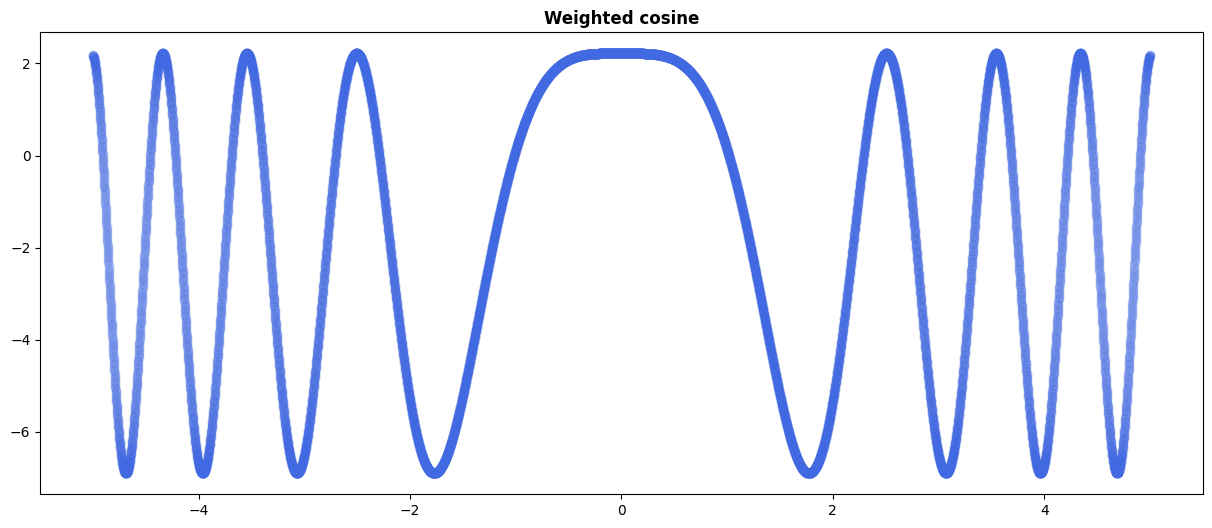

In [ ]:
plt.figure(figsize=(15, 6))
plt.scatter(X, y, alpha=0.2, c='royalblue')
plt.title('Weighted cosine', fontweight='bold')
plt.show()

From this point onward, the program does not know the formula used to generate the data. Now, let us attempt to retrieve it using symbolic regression. We will create a model for this purpose; below are the parameters of this model.

In [ ]:
parameters = dict(binary_operators=["+", "-", "*", "/"],
                  unary_operators=["cos", "exp", "sin"],
                  maxsize=10,
                  niterations=5,
                  populations=10,
                  ncycles_per_iteration=500,
                  temp_equation_file=True)
model = PySRRegressor(**parameters)  # Initialize the model

We train the model by calling the fit method. This cell might take some time to run.

In [ ]:
model.fit(X, y)  # Train the model on the data

Compiling Julia backend...


[ Info: Started!



Expressions evaluated per second: 1.090e+04
Head worker occupation: 5.6%
Progress: 26 / 50 total iterations (52.000%)
Hall of Fame:
---------------------------------------------------------------------------------------------------
Complexity  Loss       Score     Equation
2           1.159e+01  7.971e+00  y = sin(-1.5709)
3           1.098e+01  5.419e-02  y = -0.891 + -0.891
4           9.802e+00  1.135e-01  y = cos(x₀) + -1.5905
5           9.533e+00  2.783e-02  y = exp(cos(x₀)) - 2.2822
6           5.325e+00  5.824e-01  y = cos(x₀ * x₀) / 0.24805
7           5.298e+00  5.013e-03  y = sin(cos(x₀ * x₀)) / 0.21944
8           4.526e-06  1.384e+01  y = (cos(x₀ * x₀) - 0.51341) / 0.21944
---------------------------------------------------------------------------------------------------
Press 'q' and then <enter> to stop execution early.


PySRRegressor.equations_ = [
	   pick      score                                 equation       loss  \
	0         0.000000                          sin(-1.5708609)  11.590850   
	1         0.054194                -0.89099693 + -0.89099693  10.979409   
	2         0.113462                      cos(x0) + -1.590499   9.801741   
	3         0.058479                 exp(cos(x0)) - 2.8186555   9.244980   
	4         0.551748                cos(x0 * x0) / 0.24804626   5.324573   
	5         0.005013           sin(cos(x0 * x0)) / 0.21943913   5.297945   
	6  >>>>  13.972959  (cos(x0 * x0) - 0.5134062) / 0.21943913   0.000005   
	
	   complexity  
	0           2  
	1           3  
	2           4  
	3           5  
	4           6  
	5           7  
	6           8  
]

After some time, several equations that match our data are identified. Each equation is associated with a loss (indicating its performance) and a score. We can then allow the model to select the best equation and display it. We anticipate that the chosen formula will closely resemble the original one used to generate the data.

In [ ]:
model.sympy()

4.55707238722647*cos(x0**2) - 2.33962921745087

#### _Does the formula found by the model resemble the original function?_

## 2 - Introducing some noise

We observed that the previous model performed perfectly, which was expected because the data was perfectly simulated. To make our approach more realistic, we will now introduce noise into the data. We have opted to add heteroscedastic Gaussian noise, where the random variables have varying variances, mimicking a realistic noisy effect.

In [ ]:
noise = np.random.rand(n_samples, 1) * np.random.randn(n_samples, 1)

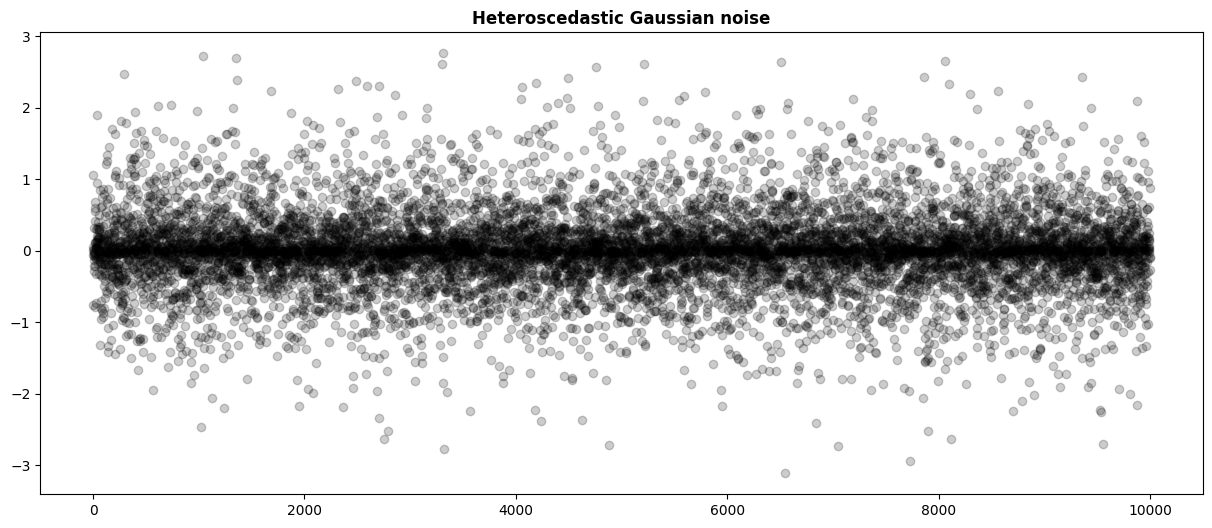

In [ ]:
plt.figure(figsize=(15, 6))
plt.scatter(range(n_samples), noise, alpha=0.2, c='black')
plt.title('Heteroscedastic Gaussian noise', fontweight='bold')
plt.show()

We can now add our freshly generated noise to the original signal $y$.

In [ ]:
noisy_y = y + noise  # Add the noise

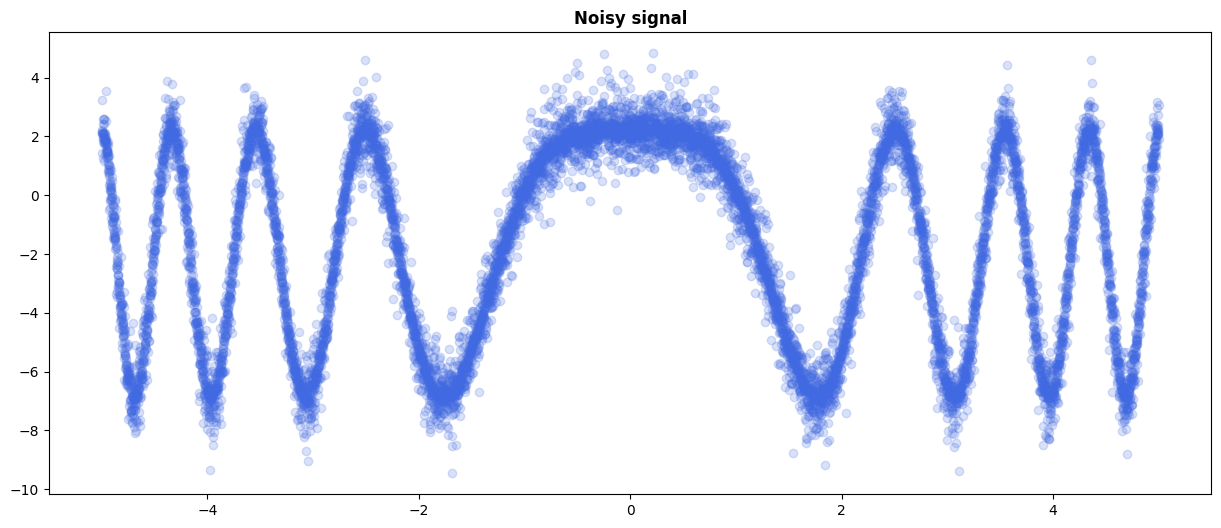

In [ ]:
plt.figure(figsize=(15, 6))
plt.scatter(X, noisy_y, alpha=0.2, c='royalblue')
plt.title('Noisy signal', fontweight='bold')
plt.show()

Again, we create and train a model with the same parameters.

In [ ]:
noisy_model = PySRRegressor(**parameters)
noisy_model.fit(X, noisy_y)

[ Info: Started!



Expressions evaluated per second: 9.900e+03
Head worker occupation: 5.7%
Progress: 25 / 50 total iterations (50.000%)
Hall of Fame:
---------------------------------------------------------------------------------------------------
Complexity  Loss       Score     Equation
2           1.194e+01  7.971e+00  y = cos(-3.1414)
3           1.134e+01  5.135e-02  y = -1.6409 / 0.92552
4           1.016e+01  1.099e-01  y = cos(x₀) - 1.5813
6           5.618e+00  2.963e-01  y = cos(x₀ * x₀) / 0.24745
8           1.588e+00  6.317e-01  y = (cos(x₀ * x₀) - 0.6738) / 0.33008
9           7.442e-01  7.580e-01  y = (cos(x₀ * x₀) - 0.6738) / sin(0.26624)
10          3.304e-01  8.120e-01  y = (cos(x₀ * x₀) * (2.3354 * 1.9553)) - 2.3319
---------------------------------------------------------------------------------------------------
Press 'q' and then <enter> to stop execution early.


PySRRegressor.equations_ = [
	   pick     score                                     equation       loss  \
	0        0.000000                              cos(-3.1413925)  11.939008   
	1        0.051354                      0.6656665 / -0.37548932  11.341366   
	2        0.109921                          cos(x0) - 1.5812762  10.160788   
	3        0.024094                    -2.2487867 + exp(cos(x0))   9.918896   
	4        0.568410                    cos(x0 * x0) / 0.24744812   5.618312   
	5  >>>>  1.413929      (cos(x0 * x0) - 0.5146423) / 0.22183959   0.332263   
	6        0.005578  exp(1.5187209) * (cos(x0 * x0) - 0.5106686)   0.330415   
	
	   complexity  
	0           2  
	1           3  
	2           4  
	3           5  
	4           6  
	5           8  
	6           9  
]

As we can see, the model performs very well, even with noisy data.

In [ ]:
noisy_model.sympy()

4.50776166688732*cos(x0**2) - 2.31988483209873

#### _Does the formula found by the `noisy_model` resemble the original function?_

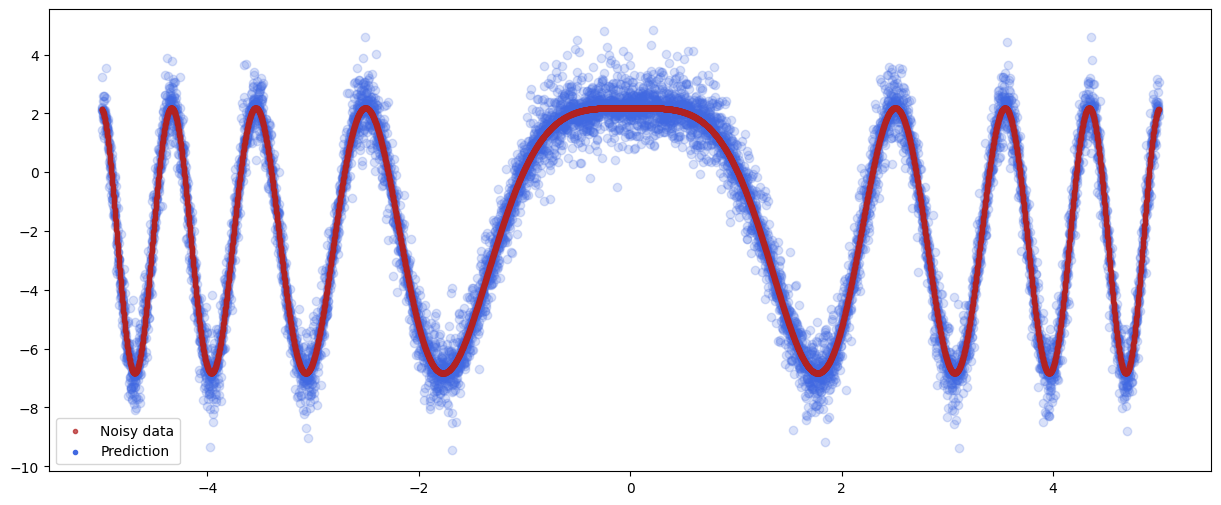

In [ ]:
plt.figure(figsize=(15, 6))
plt.scatter(X, noisy_y, alpha=0.2, c='royalblue')
plt.scatter(X, noisy_model.predict(X), alpha=0.7, marker='.', c='firebrick', label='Prediction')
plt.scatter([], [], marker='.', c='royalblue', label='Noisy data')
plt.legend()
plt.show()

## 3 - Kepler's third law

In 1619, Kepler enunciated the three laws of planetary motion. The third law states that:
$$\frac{a^3}{T^2}=\frac{G(M+m)}{4\pi^2}$$

Where
- $M$ is the mass of the star
- $m$ is the mass of the planet
- $G$ is the gravitational constant
- $T$ is the orbital period
- $a$ is the elliptical semi-major axis

Hence (with $C = \frac{2\pi}{\sqrt G}$ a constant): $$T = \sqrt \frac{a^3 \times 4\pi^2}{G \times (M + m)} = C \times a \sqrt \frac{a}{M + m}$$

<br>To find this equation, Kepler used a very similar method to symbolic regression: he tried formulas again and again until the data matched precisely. In this last part, you are going to reproduce Kepler's method with real world data, mesured by the Kepler Telescope during the K2 mission.

<br><br>Link to the original dataset by Mark di Marco: https://data.world/markmarkoh/kepler-confirmed-planets.

Firstly, here is how you load the dataset:

In [ ]:
df = pd.read_csv('planets.csv')

Now, here are 10 random rows of the dataset for you to understand its structure:

In [ ]:
df.sample(10)

,rowid,pl_hostname,pl_letter,pl_discmethod,pl_pnum,pl_orbper,pl_orbpererr1,pl_orbpererr2,pl_orbperlim,pl_orbsmax,...,st_masserr1,st_masserr2,st_masslim,st_massblend,st_rad,st_raderr1,st_raderr2,st_radlim,st_radblend,rowupdate
311,428,HD 204941,b,Radial Velocity,1,1733.000000,74.000000,-74.000000,0.0,2.560000,...,NaN,NaN,0.0,False,0.72,NaN,NaN,False,False,2014-05-14
653,3268,WASP-37,b,Transit,1,3.577469,0.000011,-0.000011,0.0,0.044600,...,0.12,NaN,0.0,NaN,1.00,0.05,NaN,False,NaN,2014-05-14
454,624,HD 9446,c,Radial Velocity,2,192.900000,0.900000,-0.900000,0.0,0.654000,...,0.10,-0.10,0.0,False,1.00,NaN,NaN,False,False,2016-03-10
721,3344,XO-3,b,Transit,1,3.191524,0.000007,-0.000007,0.0,0.045400,...,0.07,NaN,0.0,NaN,1.38,0.08,NaN,False,NaN,2014-05-14
417,576,HD 68988,b,Radial Velocity,1,6.277110,0.000210,-0.000210,0.0,0.070400,...,NaN,NaN,0.0,False,NaN,NaN,NaN,NaN,False,2015-03-26
316,434,HD 20794,b,Radial Velocity,3,18.315000,0.008000,-0.008000,0.0,0.120700,...,NaN,NaN,0.0,False,NaN,NaN,NaN,NaN,False,2015-08-27
72,121,GJ 667 C,e,Radial Velocity,5,62.240000,0.550000,-0.550000,0.0,0.213000,...,0.02,-0.02,0.0,False,NaN,NaN,NaN,NaN,False,2014-05-14
703,3324,WASP-89,b,Transit,1,3.356423,0.000003,-0.000003,0.0,0.042700,...,0.08,-0.08,0.0,False,0.88,0.03,-0.03,False,False,2015-07-09
332,458,HD 219134,b,Radial Velocity,6,3.093100,0.000100,-0.000100,0.0,0.038474,...,0.04,-0.02,0.0,False,0.77,0.02,-0.02,False,False,2015-11-19
427,586,HD 73526,b,Radial Velocity,2,188.900000,0.100000,-0.100000,0.0,0.650000,...,0.05,-0.05,0.0,False,NaN,NaN,NaN,NaN,False,2014-05-14


Before anything, we need to declare some astronomical constants:

- $G$ is the gravitational constant (in $m^3kg^{-1}s^{-2}$)
- $AU$ is the astronomical unit (in $m$)
- $S_M$ is the mass of the Sun (in $kg$)
- $J_M$ is the mass of the planet Jupiter (in $kg$)
- $E_M$ is the mass of the planet Earth (in $kg$)

In [ ]:
G = 6.674e-11
AU = 1.496e11
SM = 1.988e30
JM = 1.898e27
EM = 5.972e24

| Column               | Description                                          |
|----------------------|------------------------------------------------------|
| pl_hostname          | Host Name                                            |
| pl_letter            | Planet Letter                                        |
| pl_discmethod        | Discovery Method                                     |
| pl_pnum              | Number of Planets in System                          |
| pl_orbper            | Orbital Period ($days$)                                |
| pl_orbsmax           | Orbit Semi-Major Axis ($AU$)                           |            
| pl_orbeccen          | Eccentricity                                         |                            
| pl_orbincl           | Inclination ($deg$)                                    |
| pl_bmassj            | Planet Mass ($J_M$)               |
| pl_radj              | Planet Radius ($J_{radii}$)                        |
| pl_dens              | Planet Density ($g/cm^3$)                              |
| st_dist              | Distance ($pc$)                                        |
| st_optmag            | Optical Magnitude ($mag$)                              |
| st_teff              | Effective Temperature ($K$)                            |
| st_mass              | Stellar Mass ($S_M$)                            |
| st_rad               | Stellar Radius ($S_{radii}$)                         |


We need to identify the four variables ($a$, $T$, $m$ and $M$). Choose the relevant columns to define each of them. You have the example for the orbit semi-major axis $a$.

In [ ]:
df['a'] = df['pl_orbsmax']
df['T'] = df['pl_orbper']
df['m'] = df['pl_bmassj'] * JM / SM  # Convert the unit from Jupiter mass to Sun mass for homogeneity
df['M'] = df['st_mass']

Let us check that the variables are correctly defined.

In [ ]:
kepler = df[['pl_hostname', 'pl_letter', 'a', 'T', 'm', 'M']].dropna()
kepler.sample(10)

,pl_hostname,pl_letter,a,T,m,M
412,HD 65216,c,0.54000,152.600000,0.000162,0.92
38,CoRoT-16,b,0.06180,5.352270,0.000511,1.10
718,XO-2 N,b,0.03673,2.615859,0.000570,0.97
351,HD 23596,b,2.77200,1561.000000,0.007361,1.16
710,WASP-98,b,0.03762,2.962640,0.000880,0.81
506,Kepler-101,b,0.04740,3.487681,0.000153,1.17
512,Kepler-11,f,0.25000,46.688800,0.000006,0.96
18,8 UMi,b,0.49000,93.400000,0.001432,1.80
206,HD 12661,b,0.80790,262.709000,0.002077,1.02
2,14 And,b,0.83000,185.840000,0.004583,2.20


We want to find a formula for the orbital period $T$, knowing the three other variables.

In [ ]:
X_kepler = kepler[['a', 'M', 'm']].values
y_kepler = kepler[['T']].values

Now you can choose the parameters for our new model `kepler_model`. In particular, select the `binary_operators` (default is $[+, -, *, /]$) and the `unary_operators` (for example $[sin, cos, tan, sqrt, round, ceil, floor, sgn, log]$). Additionally, you can choose the maximal complexity of the equation `maxsize`, the number of iterations of the algorithm `niterations` and the number of populations running `populations`.

The full documentation with list of all parameters can be found at https://astroautomata.com/PySR/api/.

In [ ]:
kepler_parameters = dict(binary_operators=['+', '-', '*', '/'],
                         unary_operators=['sqrt'],
                         maxsize=10,
                         niterations=50,
                         populations=100,
                         temp_equation_file=True)
kepler_model = PySRRegressor(**kepler_parameters)

#### _Try to change another parameter from the documentation in `kepler_model`._

Now run your model to find a matching formula for Kepler's thirs law:

In [ ]:
kepler_model.fit(X_kepler, y_kepler)

[ Info: Started!



Expressions evaluated per second: 1.250e+05
Head worker occupation: 33.1%
Progress: 251 / 5000 total iterations (5.020%)
Hall of Fame:
---------------------------------------------------------------------------------------------------
Complexity  Loss       Score     Equation
2           6.167e+07  7.971e+00  y = sqrt(6.8713e+05)
3           6.102e+06  2.313e+00  y = 2049.1 * x₀
5           1.635e+06  6.585e-01  y = (x₀ * 30.749) * x₀
6           1.315e+05  2.521e+00  y = (x₀ * 273.56) * sqrt(x₀)
8           7.827e+04  2.593e-01  y = (x₀ * 266.5) * sqrt(x₀ + 2.9664)
10          7.005e+04  5.549e-02  y = (x₀ * 273.56) * sqrt(x₀ + (1.7339 / x₁))
---------------------------------------------------------------------------------------------------
Press 'q' and then <enter> to stop execution early.

Expressions evaluated per second: 1.450e+05
Head worker occupation: 28.3%
Progress: 605 / 5000 total iterations (12.100%)
Hall of Fame:
----------------------------------------------------------

PySRRegressor.equations_ = [
	   pick         score                                  equation          loss  \
	0        0.000000e+00                                  829.0122  6.166771e+07   
	1        1.156571e+00                            x0 * 2049.1116  6.102007e+06   
	2        6.584764e-01                     (x0 * 30.749138) * x0  1.635036e+06   
	3        2.520644e+00                sqrt(x0) * (x0 * 273.5605)  1.314697e+05   
	4        2.849184e+00          (sqrt(x0 / x1) * x0) * 364.65524  4.406116e+02   
	5        2.269573e-07  ((sqrt(x0) / sqrt(x1)) * x0) * 364.65524  4.406115e+02   
	6  >>>>  4.679309e-01    (sqrt(x0 / (x1 + x2)) * x0) * 364.9258  2.759536e+02   
	
	   complexity  
	0           1  
	1           3  
	2           5  
	3           6  
	4           8  
	5           9  
	6          10  
]

And display the best scoring equation.

In [ ]:
kepler_model.sympy()

364.9258*x0*sqrt(x0/(x1 + x2))

#### _Does this formula look like Kepler's third law? You should get something of the form:_ $C \times x_0 \sqrt \frac{x_0}{x_1 + x_2}$
#### _If not, do you understand why and what can you change in your model?_

You can also select an equation from its index in the summary table.

In [ ]:
kepler_model.sympy(index=2)

30.749138*x0**2

In the following graph, you can see the distribution of the planets orbit depending on the mass of their star and their semi-major axis. The colored circles is the ground truth and the red triangles indicate the model prediction for each planet.

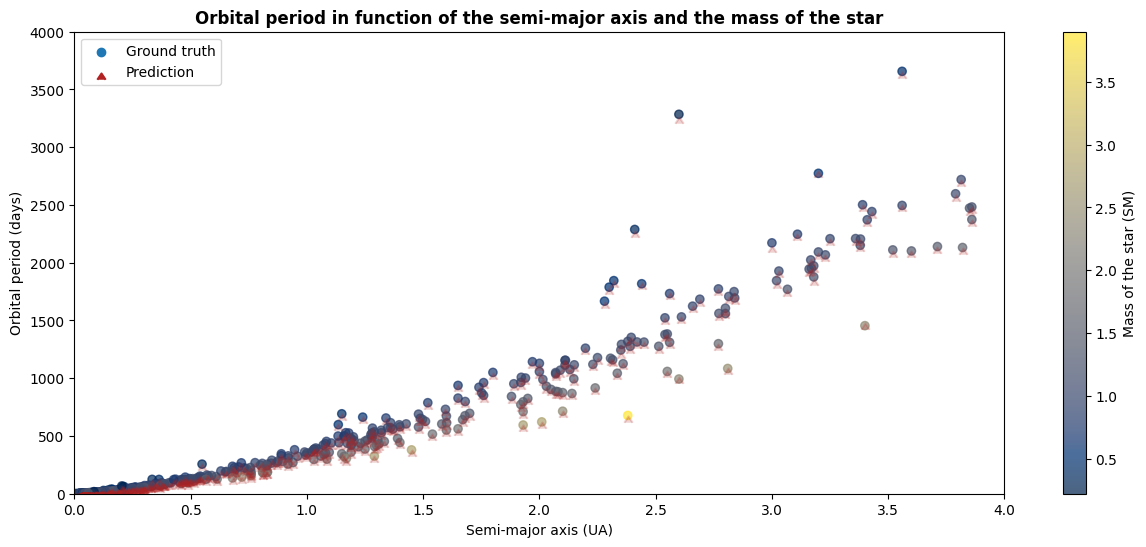

In [ ]:
plt.figure(figsize=(15, 6))
sma = X_kepler.T[0].reshape(y_kepler.shape)
s_mass = X_kepler.T[1].reshape(y_kepler.shape)
scatter = plt.scatter(sma, y_kepler, alpha=0.7, c=s_mass, cmap='cividis')
cbar = plt.colorbar(scatter)
cbar.set_label('Mass of the star (SM)', rotation=90)
plt.scatter(sma, kepler_model.predict(X_kepler, index=2), alpha=0.2, marker=6, c='firebrick')
plt.scatter([], [], cmap='cividis', label='Ground truth')
plt.scatter([], [], marker=6, c='firebrick', label='Prediction')
plt.xlim([0, 4])
plt.ylim([0, 4_000])
plt.xlabel('Semi-major axis (UA)')
plt.ylabel('Orbital period (days)')
plt.title('Orbital period in function of the semi-major axis and the mass of the star', fontweight='bold')
plt.legend()
plt.show()

Finally, we can predict the orbital period of a known planet, to further test the validity of the model. Down bellow are the values corresponding to the planet Earth, from the solar system.

In [ ]:
SMA    = AU  # Semi-major axis
S_MASS = SM  # Mass of the star
P_MASS = EM  # Mass of the planet
S_NAME = 'the Sun'  # Name of the star
P_NAME = 'the Earth'  # Name of the planet

In [ ]:
PLANET = np.array([[SMA / AU, S_MASS / SM, P_MASS / JM]])
PERIOD = kepler_model.predict(PLANET)[0]
print(f'According to your model, {P_NAME} takes {PERIOD:.1f} days to orbit {S_NAME}.')

According to your model, the Earth takes 364.4 days to orbit the Sun.


#### _Does it sound reasonable?_